In [4]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 83 kB/s 


In [1]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 210 kB 58.7 MB/s 
     |████████████████████████████████| 81 kB 9.7 MB/s 
     |████████████████████████████████| 78 kB 7.5 MB/s 
     |████████████████████████████████| 112 kB 59.8 MB/s 
     |████████████████████████████████| 146 kB 64.7 MB/s 
     |████████████████████████████████| 49 kB 4.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=fa09068ef13c2ed31cb03094b3aaa391bfcaafdd1450ef7fe8611dc196454800
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [2]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=11d0adf355eb0d25871723d7457544ab10ecbedae5c27a14f9d5d9591986a6ad
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [3]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.3 MB/s 


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import optuna
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
train = pd.read_csv('/content/drive/MyDrive/Techgig - HWE Hackathon - May - 2022/Phising_Training_Dataset.csv')
test = pd.read_csv('/content/drive/MyDrive/Techgig - HWE Hackathon - May - 2022/Phising_Testing_Dataset.csv')

## Preprocessing

In [10]:
def preprocess_inputs(df):
    df = df.copy()
    
    # drop 'key' feature because it's just unique value
    df = df.drop('key', axis=1)
    
    # replacing -1, 0, 1 to it's original values
    df = df.replace({-1:'phishing', 0:'suspicious', 1:'legitimate'})
    
    # Split df into X & y
    y = df['Result'].copy()
    X = df.drop('Result', axis=1)
    
    # these are the columns having above 0.7 correlation, So I removed them by testing these correlation on heatmap which is shown below
    X = X.drop(['Favicon', 'port', 'Iframe', 'popUpWidnow', 'Abnormal_URL', 'HTTPS_token', 'Shortining_Service'], axis=1)
    
    # Applying one-hot encoding to the categorical columns
    X = pd.get_dummies(X, drop_first=True)
    
    return X, y

In [11]:
X, y = preprocess_inputs(train)

In [12]:
X

,having_IP_phishing,URL_Length_phishing,URL_Length_suspicious,having_At_Symbol_phishing,double_slash_redirecting_phishing,Prefix_Suffix_phishing,having_Sub_Domain_phishing,having_Sub_Domain_suspicious,SSLfinal_State_phishing,SSLfinal_State_suspicious,...,RightClick_phishing,age_of_domain_phishing,DNSRecord_phishing,web_traffic_phishing,web_traffic_suspicious,Page_Rank_phishing,Google_Index_phishing,Links_pointing_to_page_phishing,Links_pointing_to_page_suspicious,Statistical_report_phishing
0,1,0,0,0,1,1,1,0,1,0,...,0,1,1,1,0,1,0,0,0,1
1,0,0,0,0,0,1,0,1,0,0,...,0,1,1,0,1,1,0,0,0,0
2,0,0,1,0,0,1,1,0,1,0,...,0,0,1,0,0,1,0,0,1,1
3,0,0,1,0,0,1,1,0,1,0,...,0,1,1,0,0,1,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,0,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
8951,1,0,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8952,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
8953,1,1,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
y

0         phishing
1         phishing
2         phishing
3         phishing
4       legitimate
           ...    
8950    legitimate
8951      phishing
8952      phishing
8953      phishing
8954      phishing
Name: Result, Length: 8955, dtype: object

## Visualizing Correlations

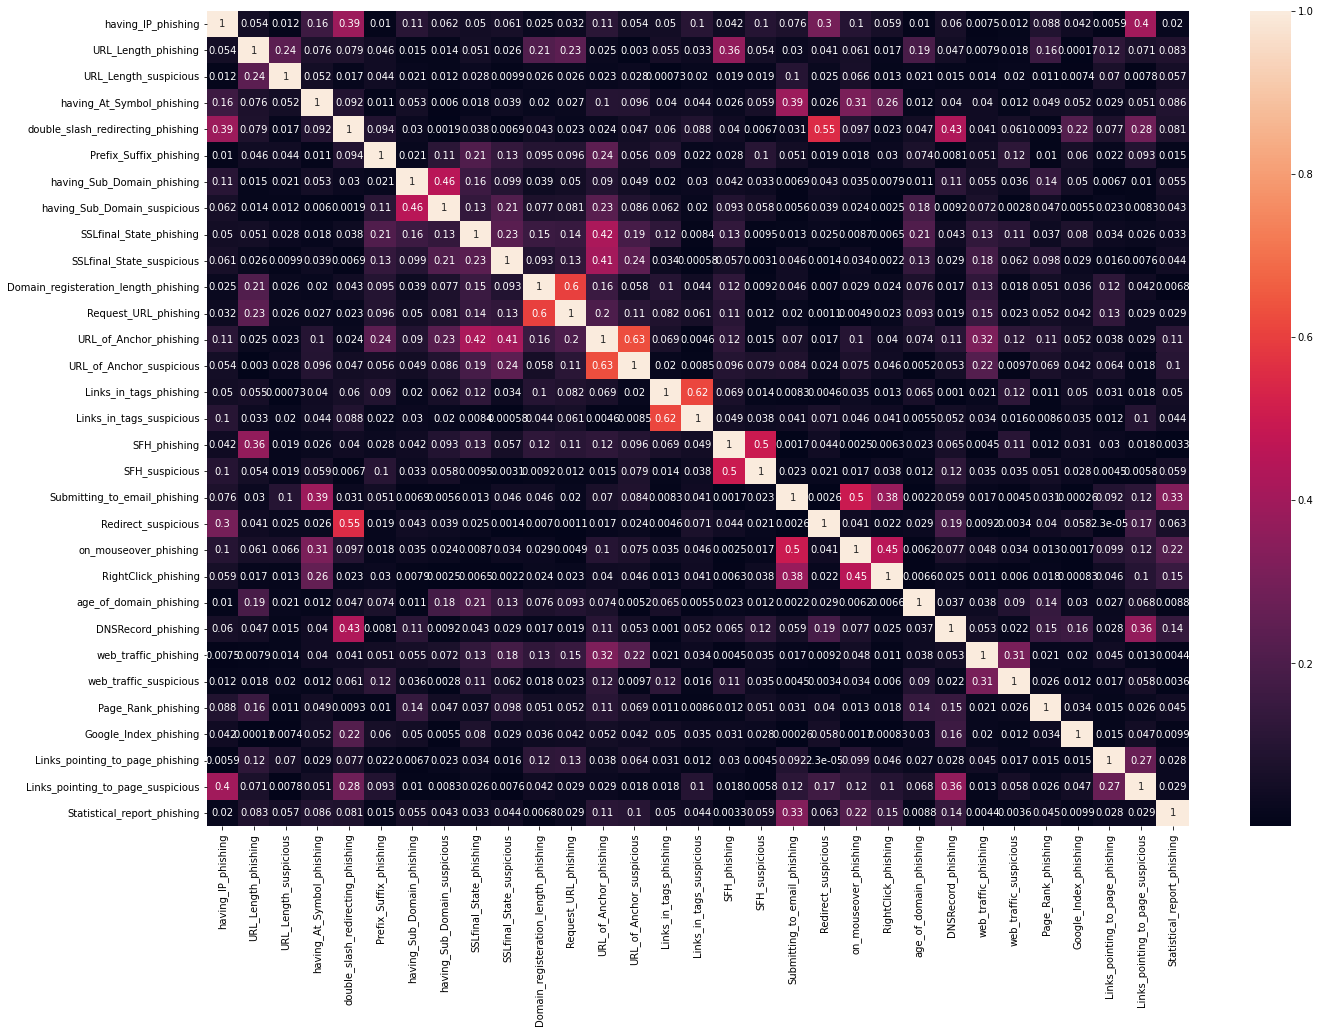

In [14]:
corr = np.abs(X.corr())

plt.figure(figsize=(22, 15))
sns.heatmap(corr, annot=True)
plt.show()

## train-test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

## Applying Scaling (StandardScaler) - Z Score

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

## Training

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score

In [18]:
models = {
    'Logistic Regression' : LogisticRegression(),
    '     Neural Network' : MLPClassifier(),
    'K Nearest Neighbors' : KNeighborsClassifier(),
    '   SVM (rbf kernel)' : SVC(),
    'SVM (Linear Kernel)' : LinearSVC(),
    '      Decision Tree' : DecisionTreeClassifier(),
    '         Extra Tree' : ExtraTreeClassifier(),
    '      Random Forest' : RandomForestClassifier(),
    '           CatBoost' : CatBoostClassifier(verbose=0),
    '     Light Gradient' : LGBMClassifier(),
    '            XGBoost' : XGBClassifier(eval_metric='mlogloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

Logistic Regression trained.
     Neural Network trained.
K Nearest Neighbors trained.
   SVM (rbf kernel) trained.
SVM (Linear Kernel) trained.
      Decision Tree trained.
         Extra Tree trained.
      Random Forest trained.
           CatBoost trained.
     Light Gradient trained.
            XGBoost trained.


## Results

In [19]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label='legitimate')
    print(name + " Accuracy: {:.3f}%".format(acc * 100))
    print(name + " F1 Score: {:.5f}".format(f1))
    print('')

Logistic Regression Accuracy: 94.045%
Logistic Regression F1 Score: 0.94716

     Neural Network Accuracy: 96.316%
     Neural Network F1 Score: 0.96734

K Nearest Neighbors Accuracy: 94.753%
K Nearest Neighbors F1 Score: 0.95376

   SVM (rbf kernel) Accuracy: 95.683%
   SVM (rbf kernel) F1 Score: 0.96177

SVM (Linear Kernel) Accuracy: 93.748%
SVM (Linear Kernel) F1 Score: 0.94448

      Decision Tree Accuracy: 95.720%
      Decision Tree F1 Score: 0.96216

         Extra Tree Accuracy: 94.827%
         Extra Tree F1 Score: 0.95438

      Random Forest Accuracy: 96.502%
      Random Forest F1 Score: 0.96898

           CatBoost Accuracy: 96.278%
           CatBoost F1 Score: 0.96687

     Light Gradient Accuracy: 96.688%
     Light Gradient F1 Score: 0.97064

            XGBoost Accuracy: 94.231%
            XGBoost F1 Score: 0.94890



## Optimization

In [39]:
## for LGBM Classifier

def get_results(trial):
  optuna_params = {
      'n_estimators' : trial.suggest_categorical("n_estimators", [1000]),
      'learning_rate' : trial.suggest_loguniform("learning_rate", 0.00005, 0.3),
      'num_leaves' : trial.suggest_int('num_leaves', 6, 3000),
      'max_depth' : trial.suggest_int('max_depth', 3, 12),
      'min_data_in_leaf' : trial.suggest_int('min_data_in_leaf', 200, 10000, step=100),
      'max_bin' : trial.suggest_int('max_bin', 200, 300),
      'lambda_l1' : trial.suggest_int('lambda_l1', 0, 100, step=5),
      'lambda_l2' : trial.suggest_int('lambda_l2', 0, 100, step=5),
      'min_gain_to_split' : trial.suggest_float('min_gain_to_split', 0, 15),
      'bagging_fraction' : trial.suggest_float('bagging_fraction', 0.2, 0.95, step=0.1),
      'bagging_freq' : trial.suggest_categorical('bagging_freq', [1]),
      'feature_fraction' : trial.suggest_float('feature_fraction', 0.2, 0.95, step=0.1),
      'min_child_leaves' : trial.suggest_int('min_child_leaves', 100, 500),
      'min_child_weight' : trial.suggest_loguniform('min_child_weight', 0.00001, 10000),
      'subsample' : trial.suggest_loguniform('subsample', 0.2, 0.99),
      'colsample_bytree' : trial.suggest_loguniform('colsample_bytree', 0.4, 0.99),
      'reg_alpha' : trial.suggest_float('reg_alpha', 0, 100),
      'reg_lambda' : trial.suggest_loguniform('reg_lambda', 0.1, 100)
  }

  model = LGBMClassifier(**optuna_params, random_state=0)
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [40]:
study = optuna.create_study(direction='maximize')
study.optimize(get_results, n_trials=100, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [41]:
best_params = study.best_params
best_params

{'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'colsample_bytree': 0.5525537639403593,
 'feature_fraction': 0.4,
 'lambda_l1': 35,
 'lambda_l2': 15,
 'learning_rate': 0.007326239310872739,
 'max_bin': 221,
 'max_depth': 6,
 'min_child_leaves': 182,
 'min_child_weight': 1.401152240580425e-05,
 'min_data_in_leaf': 500,
 'min_gain_to_split': 0.0023007651346786395,
 'n_estimators': 1000,
 'num_leaves': 1334,
 'reg_alpha': 10.628574785906665,
 'reg_lambda': 1.129755847561871,
 'subsample': 0.2594364598239102}

In [42]:
final_model = LGBMClassifier(
    bagging_fraction=best_params['bagging_fraction'],
    bagging_freq=best_params['bagging_freq'],
    feature_fraction=best_params['feature_fraction'],
    lambda_l1=best_params['lambda_l1'],
    lambda_l2=best_params['lambda_l2'],
    learning_rate=best_params['learning_rate'],
    max_bin=best_params['max_bin'],
    max_depth=best_params['max_depth'],
    min_data_in_leaf=best_params['min_data_in_leaf'],
    min_gain_to_split=best_params['min_gain_to_split'],
    min_child_leaves=best_params['min_child_leaves'],
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda']
)

final_model.fit(X_train, y_train)

acc = final_model.score(X_test, y_test)

In [43]:
print("Test Accuracy: {:.3f}%".format(acc * 100))

Test Accuracy: 88.947%


## Test Data Preprocessing

In [44]:
# making a copy of test data before preprocessing
df1 = test.copy()

In [46]:
# dropping 'key' column because it's just unique values
df1 = df1.drop('key', axis=1)

In [47]:
# replacing -1, 0, 1 to it's original values
df1 = df1.replace({-1:'phishing', 0:'suspicious', 1:'legitimate'})

In [48]:
# these are the columns having above 0.7 correlation, So I removed them by testing as I did on train data
df1 = df1.drop(['Favicon', 'port', 'Iframe', 'popUpWidnow', 'Abnormal_URL', 'HTTPS_token', 'Shortining_Service'], axis=1)

In [49]:
# Applying one-hot encoding to the categorical columns
df1 = pd.get_dummies(df1, drop_first=True)

## Applying Scaler on test data

In [50]:
df1 = pd.DataFrame(scaler.transform(df1), index=df1.index, columns=df1.columns)

## Prediction of test data

### I tried using Hyperparameter Tuning but it reduced the accuracy score. So, I used prediction using raw model without any parameter.

In [62]:
model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [63]:
model.score(X_test, y_test)

0.9668775586155564

In [70]:
p = model.predict(X_test)
f1_score(y_test, p, pos_label='legitimate')

0.9706367535466843

## Prediction of Test Data

In [64]:
pred = model.predict(df1)

## Creating dataframe as submission as csv file to submit the result

In [65]:
submission = pd.DataFrame(test['key'])
submission['Result'] = pred

### Replacing 'legitimate' to 1 and 'phishing' to -1 as to submit the .csv file.

In [66]:
submission = submission.replace({'legitimate':1, 'phishing':-1})

### Creating the .csv file

In [67]:
submission.to_csv('submission.csv', index=False)